In [1]:
import pickle

results = pickle.load(open("outputs/results/dino_24.pkl", "rb"))
results[0]

{'batch_input_shape': (800, 1200),
 'img_id': 0,
 'img_shape': (800, 1200),
 'ori_shape': (2592, 3888),
 'scale_factor': (0.30864197530864196, 0.30864197530864196),
 'pad_shape': (800, 1200),
 'img_path': 'data/aircraft/dataset/f0055552c8a0538a76b175765f443b97.jpg',
 'pred_instances': {'labels': tensor([60, 31, 29, 28, 57, 27, 38, 23, 65, 25, 54, 30, 74, 52,  9, 10, 13, 14,
          20, 16, 32, 61, 26, 71, 24, 62, 35, 55, 47, 66,  0,  4, 36, 53, 80, 69,
          12, 40, 58, 49,  1, 59,  3, 15, 70, 43,  5, 72, 67, 41, 19,  2, 39, 18,
          51, 37, 21, 48,  7, 75, 42, 79, 17, 33, 78, 57, 50, 29, 46, 31, 68, 22,
           8, 29, 77, 28, 28, 56, 28, 60, 25, 54, 31, 64, 27, 57, 76,  9, 34, 45,
          35,  6, 30, 38, 31, 42, 29, 31, 73, 54, 20, 28, 28, 80, 71, 29, 11,  4,
          52, 31, 72, 57, 62, 54, 14, 23, 27, 35, 30, 65,  0, 54, 60, 19, 15, 25,
          27, 29, 38, 35, 30, 57, 31,  3, 15, 28, 32,  9, 65, 27, 70,  4, 61, 16,
          29, 20, 71, 23, 27, 24, 30, 52, 62, 28,

In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict


def plot_metrics(log_files, metrics_to_track={"coco/bbox_mAP", "coco/bbox_mAP_50"}):
    # Dictionary to store {metric: [(epoch, value), ...]}
    metric_data = {metric: [] for metric in metrics_to_track}

    for file_path in log_files:
        with open(file_path, "r") as f:
            for line in f:
                try:
                    data = json.loads(line)
                    epoch = data.get("epoch", data.get("step", None))
                    if epoch is None:
                        continue

                    for metric in metrics_to_track:
                        if metric in data:
                            metric_data[metric].append((epoch, data[metric]))
                except json.JSONDecodeError:
                    continue  # skip malformed lines

    # Plot
    plt.figure(figsize=(10, 5))
    for metric, points in metric_data.items():
        if points:
            points = sorted(points, key=lambda x: x[0])
            epochs, values = zip(*points)
            label = metric.replace("coco/", "")
            plt.plot(epochs, values, marker="o", label=label)

    plt.title("Validation Metrics over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


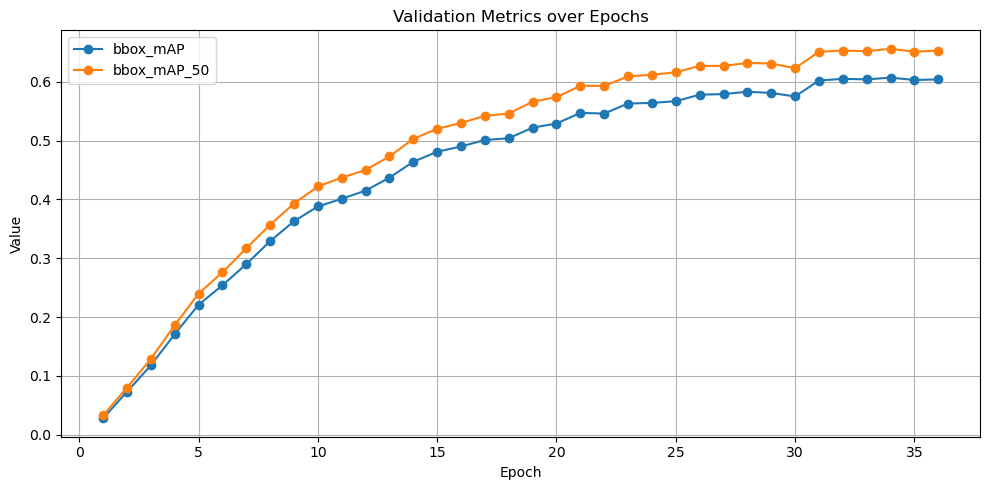

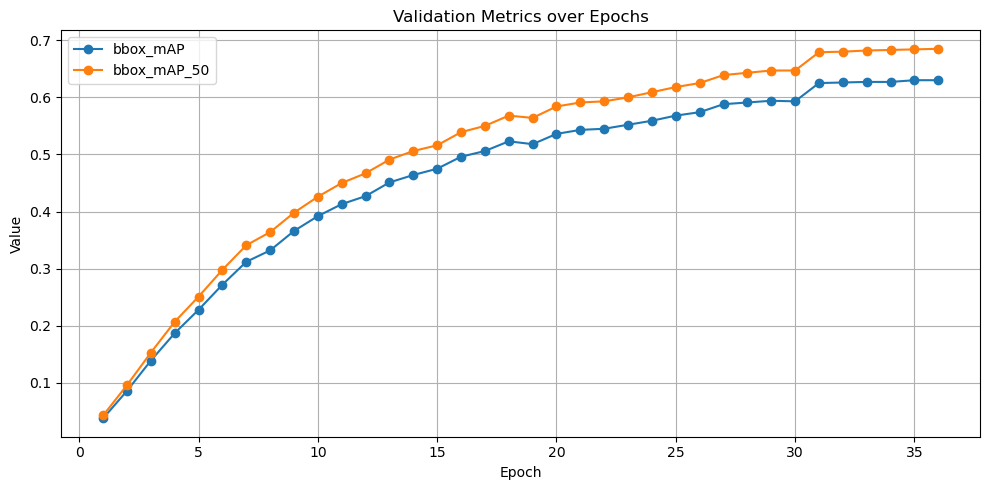

In [3]:
# Call the function to plot mAP
log_files = [
    "work_dirs/dino-4scale_r50_improved_8xb2/20250405_112939/vis_data/scalars.json"
]
plot_metrics(log_files)

log_files = [
    "work_dirs/frozen-4scale_r50_improved_8xb2/20250407_074619/vis_data/scalars.json",
    "work_dirs/frozen-4scale_r50_improved_8xb2/20250407_200116/vis_data/scalars.json"
]
plot_metrics(log_files)


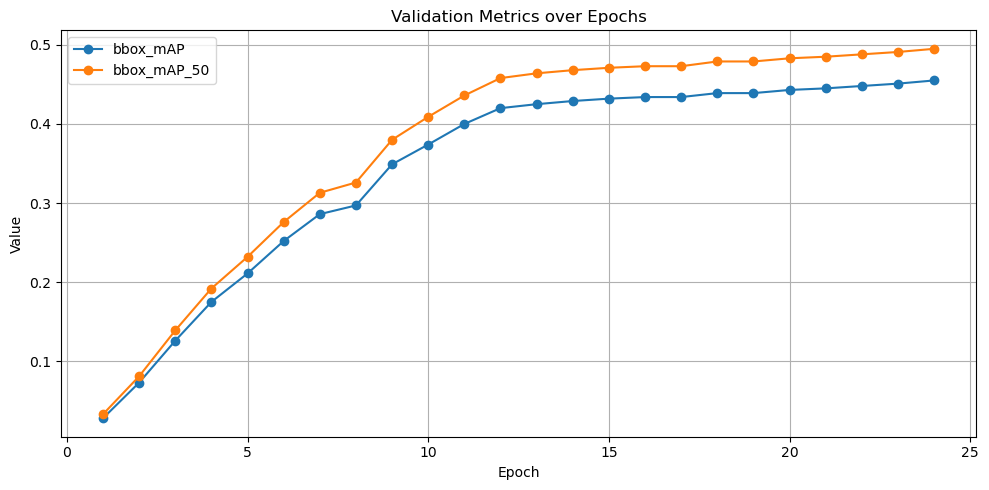

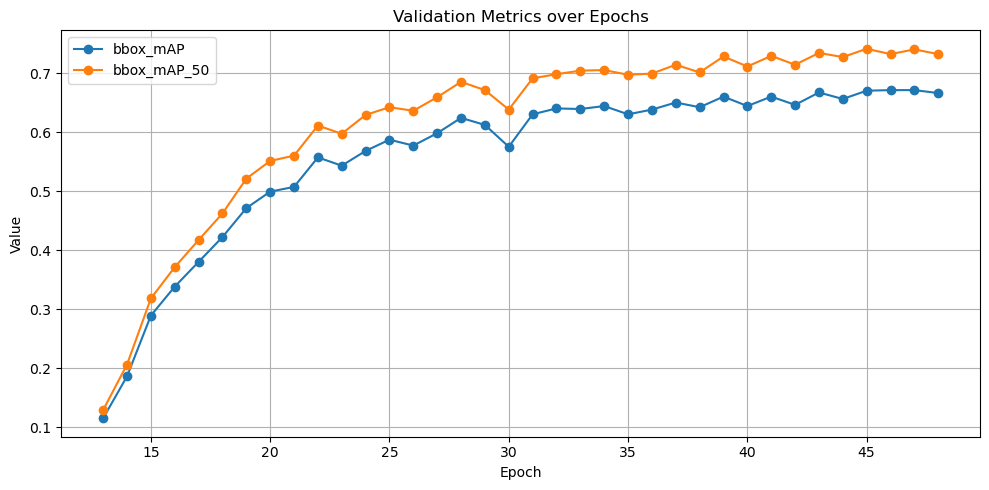

In [4]:
log_files = [
    "work_dirs/dino-4scale_r50_improved_8xb2/20250404_122915/vis_data/scalars.json",
    "work_dirs/dino-4scale_r50_improved_8xb2/20250404_235356/vis_data/scalars.json",
]
plot_metrics(log_files)

log_files = [
    "work_dirs/frozen_dino/20250403_162717/vis_data/scalars.json",
    "work_dirs/frozen_dino/20250403_090055/vis_data/scalars.json"
]
plot_metrics(log_files)


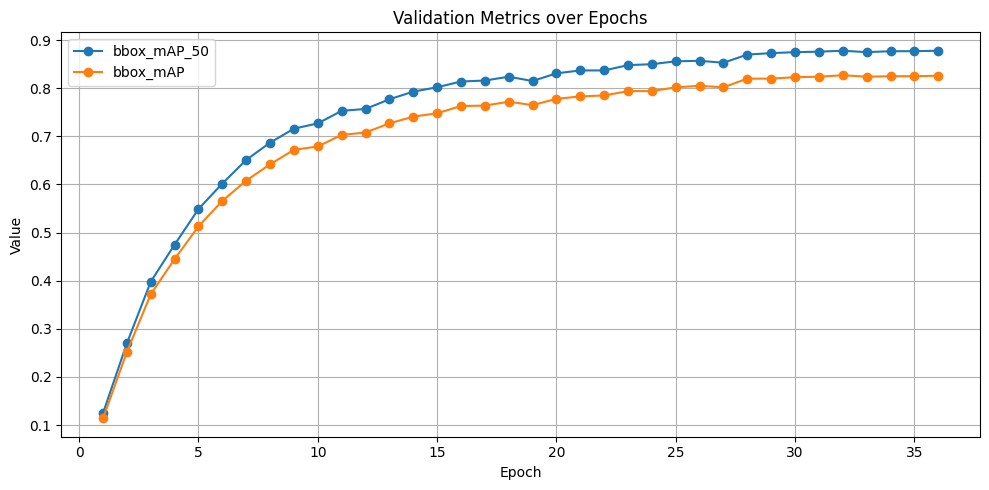

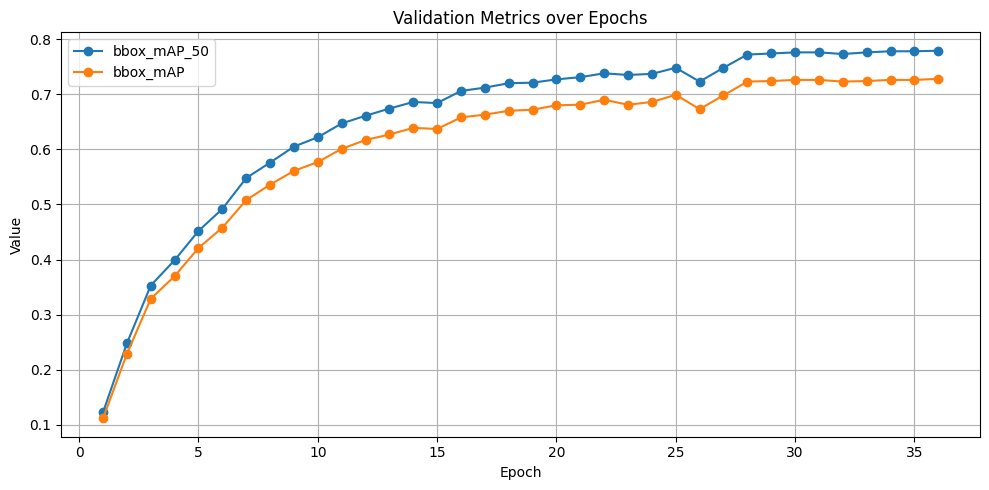

In [9]:
# Call the function to plot mAP
log_files = [
    "work_dirs/dino-5scale_swin-l_8xb2/20250405_143628/vis_data/scalars.json",
    "work_dirs/dino-5scale_swin-l_8xb2/20250407_114446/vis_data/scalars.json"
]
plot_metrics(log_files)

# Call the function to plot mAP
log_files = [
    "work_dirs/frozen-dino-5scale_swin-l_8xb2/20250408_082105/vis_data/scalars.json"
]
plot_metrics(log_files)

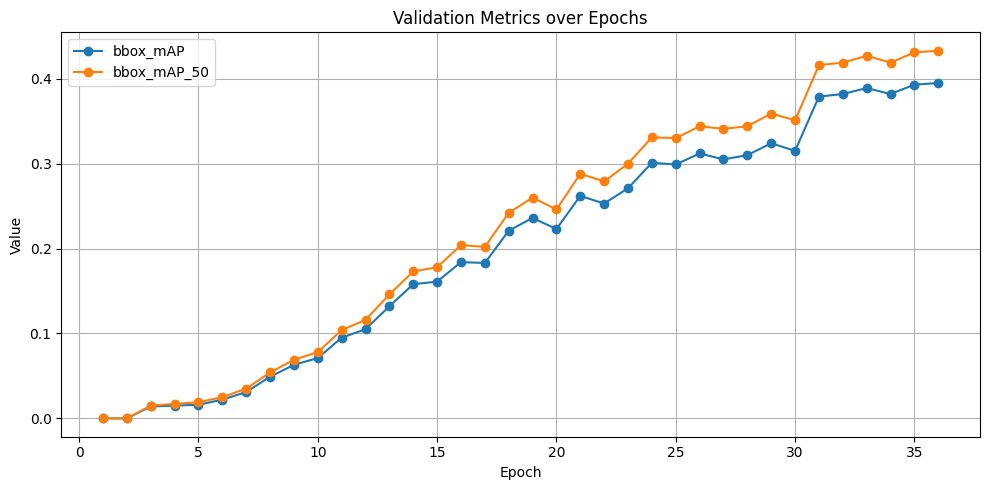

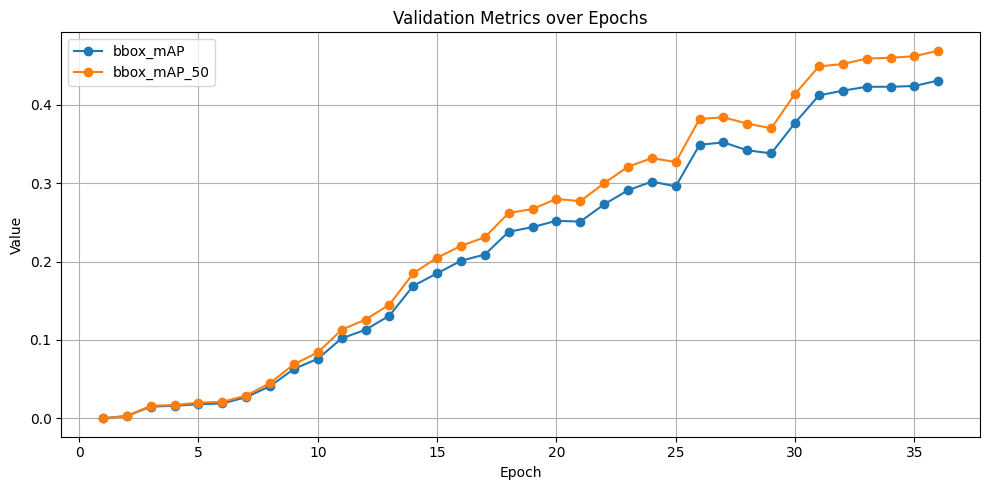

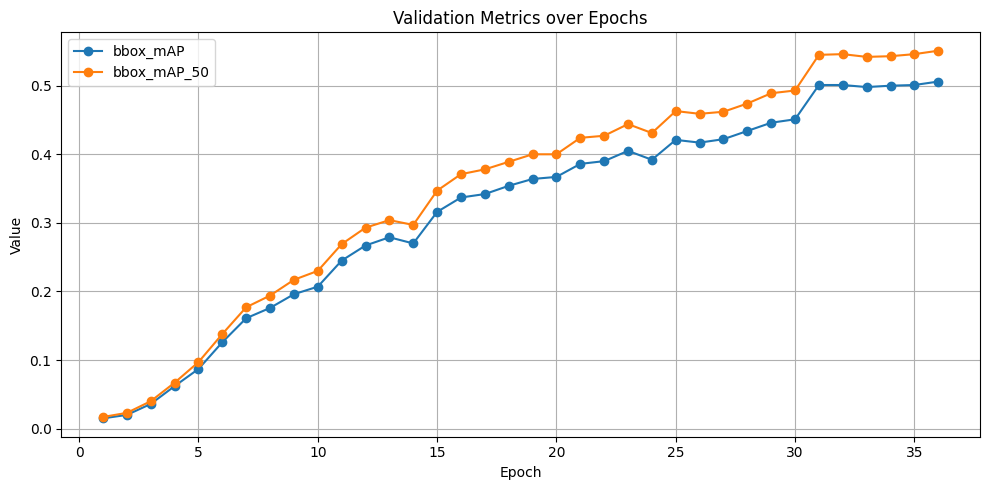

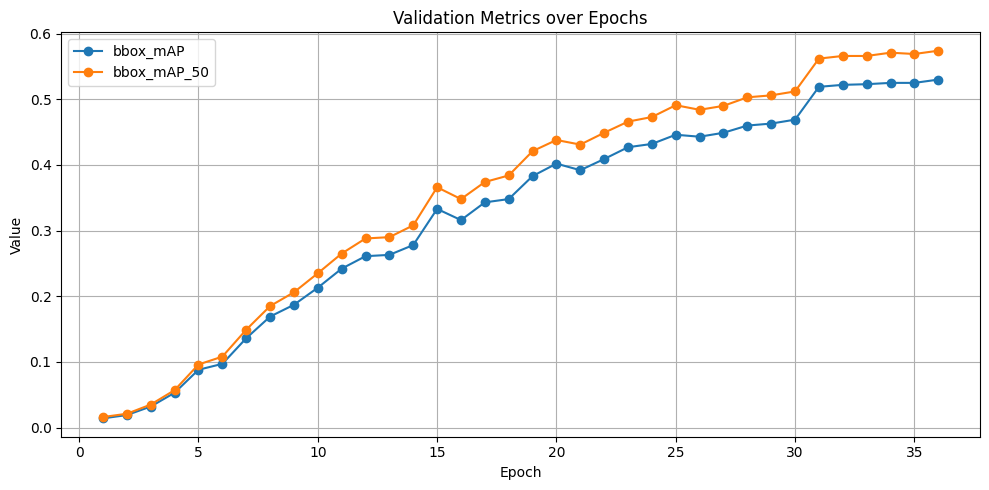

In [5]:
# RAW
log_files = [
    "work_dirs/dino-4scale_r50-raw_improved_8xb2/20250425_134232/vis_data/scalars.json"
]
plot_metrics(log_files)

# Scaled RAW
log_files = [
    "work_dirs/dino-4scale_r50-raw-scaled_improved_8xb2/20250424_201527/vis_data/scalars.json"
]
plot_metrics(log_files)

# With Linear Layer
log_files = [
    "work_dirs/dino-4scale_r50-proj_improved_8xb2/20250426_102349/vis_data/scalars.json"
]
plot_metrics(log_files)

# With Shared Classifiers
log_files = [
    "work_dirs/dino-4scale_r50-shared-proj_improved_8xb2/20250424_050116/vis_data/scalars.json"
]
plot_metrics(log_files)


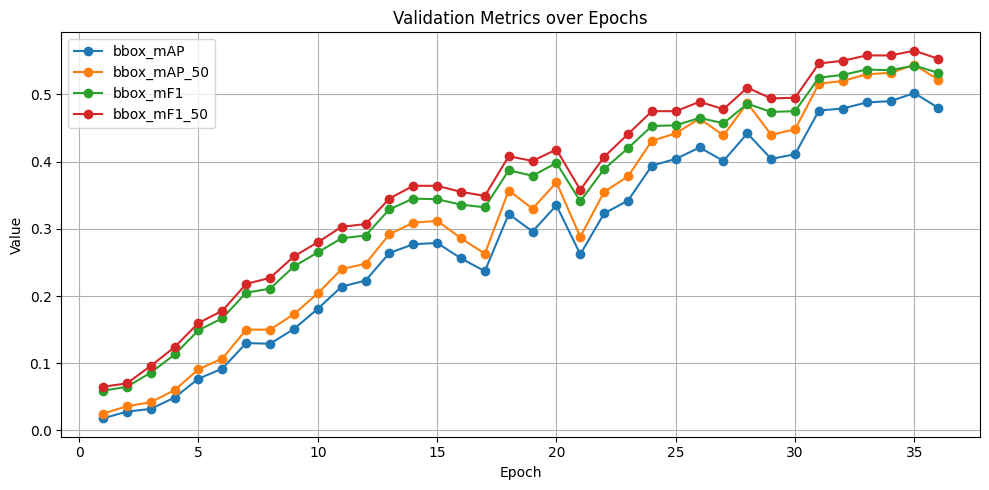

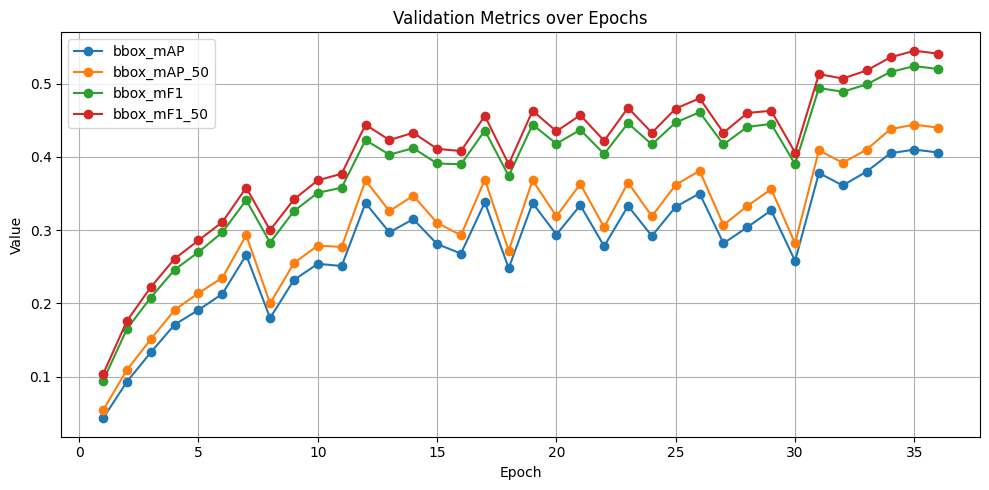

In [ ]:
# With Shared Classifiers
log_files = [
    "work_dirs/dino-4scale_r50-shared-proj_improved_8xb2/20250427_071406/vis_data/scalars.json"
]
plot_metrics(log_files, metrics_to_track=["coco/bbox_mAP", "coco/bbox_mAP_50", "coco/bbox_mF1", "coco/bbox_mF1_50"])

# Standard DINO
log_files = [
    "work_dirs/dino-4scale_r50_improved_8xb2/20250428_044942/vis_data/scalars.json"
]
plot_metrics(log_files, metrics_to_track=["coco/bbox_mAP", "coco/bbox_mAP_50", "coco/bbox_mF1", "coco/bbox_mF1_50"])